0.4713333333333188
1.4139999999999566
0.23566666666665945
0.7069999999999783
0.7069999999999783
0.23566666666665945
0.7069999999999781
0.4713333333327077
0.2356666666666594
0.47133333333331884
0.7069999999999781
1.4139999999999562
1.4139999999999566
1.4139999999999566
0.23566666666650662
inf
0.2356666666666594
1.4139999999999566
0.35349999999998905
0.7069999999999783
1.4139999999999555
1.4139999999999566
1.4139999999999566
1.413999999999958
0.2827999999997713
0.35349999999998905
0.7069999999999781
0.4713333333333189
0.4713333333333189
inf
0.2827999999999913
0.7069999999999781
1.4139999999999566
1.413999999999958
1.4139999999999562
0.35349999999998905
0.35349999999998916
inf
0.4713333333333188
0.35349999999998916
0.7069999999999783


/var/folders/33/900cs4hj2q396s1cp96kyn8c0000gn/T/ipykernel_58884/960124181.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  print((t[1] - t[0]) / delta_t_begin * 1.414)
/var/folders/33/900cs4hj2q396s1cp96kyn8c0000gn/T/ipykernel_58884/960124181.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  print((t[1] - t[0]) / delta_t_begin * 1.414)
/var/folders/33/900cs4hj2q396s1cp96kyn8c0000gn/T/ipykernel_58884/960124181.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  print((t[1] - t[0]) / delta_t_begin * 1.414)


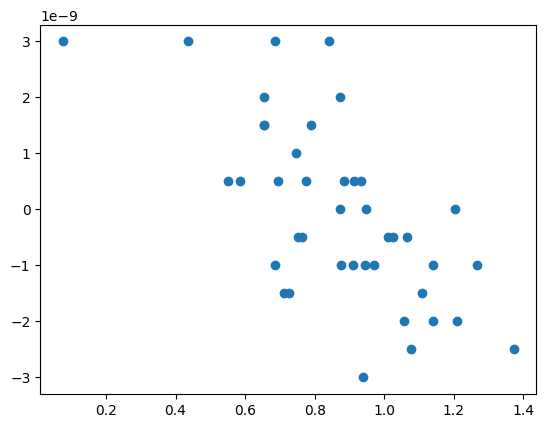

Result:  1.3050392631059213
Correlation:  0.44220220850519537
[7.82344369e-10 7.03426283e-10]
Uncetainty:  0.1798438694365093


In [25]:
#import ROOT
#from ROOT import TCanvas, RDataFrame
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

t1 = np.array([])
t2 = np.array([])
q1 = np.array([])
q2 = np.array([])
uncertainty_t = np.array([])

for i in range(41):
    # Read csv files
    df = pd.read_csv("../ExperimentData/AttenuationLength/Lengtha" + str(i) + ".csv")
    t = df['Time(s)'].values
    
    ch1 = df['CH1V'].values
    ch2 = df['CH2V'].values
    
    base1 = np.average(ch1[0:300]) # baseline
    base2 = np.average(ch2[0:300])

    # Find indexes of minimum
    min1 = np.min(ch1)
    min2 = np.min(ch2)
    i1 = np.argmin(ch1) # i1 = np.where(np.min(ch1))
    i2 = np.argmin(ch2)

    # Traverse arrays to find the integral interval
    ch1s = ch1 - (0.1 * min1 + 0.9 * base1)
    ch2s = ch2 - (0.1 * min2 + 0.9 * base2)

    [index1_begin, index1_end, index2_begin, index2_end] = [i1, i1, i2, i2]

    while (ch1s[index1_begin] < 0):
        index1_begin -= 1

    while (ch1s[index1_end] < 0):
        index1_end += 1

    while (ch2s[index2_begin] < 0):
        index2_begin -= 1

    while (ch2s[index2_end] < 0):
        index2_end += 1

    [Q1, Q2] = [0, 0]
    for j in range(index1_begin, index1_end):
        delta_t = t[j + 1] - t[j]
        Q1 += delta_t * (base1 - ch1[j])
        
    for j in range(index2_begin, index2_end):
        delta_t = t[j + 1] - t[j]
        Q2 += delta_t * (base2 - ch2[j])

    t1 = np.append(t1, t[index1_begin])
    t2 = np.append(t2, t[index2_begin])
    q1 = np.append(q1, Q1)
    q2 = np.append(q2, Q2)

    # Uncetainty
    delta_t_begin = np.abs(t[index1_begin] - t[index2_begin])
    uncertainty_t = np.append(uncertainty_t, (t[1] - t[0]) / delta_t_begin * 1.414)

dt = t1 - t2
logq = np.log(q1/q2)
plt.scatter(logq, dt)
plt.show()

z, cov = np.polyfit(logq, dt, 1, cov=True) # higher power first
slope, intercept, r_value, p_value, std_err = ss.linregress(logq, dt)
print("Result: ", -z[0] * 3e8)
print("Correlation: ", r_value**2)
print(np.sqrt(np.diag(cov)))

print("Uncetainty: ", np.sqrt(np.diag(cov))[0] / -z[0])

